In [1]:
import numpy as np
import numpy.linalg as LA
import jax
import jax.numpy as jnp
import jax.numpy.linalg as JLA

import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
from jax.example_libraries import optimizers
from tqdm.notebook import trange
from functools import partial

In [15]:
n = 256
m = 128
sigma = 0.1
p = 0.1

A = np.random.randn(m, n)
eig, _ = LA.eig(A.T @ A)
Y_opt = 1.0/max(eig)
A = jnp.array(A)

In [16]:
Y_opt

(0.00135366792062623+0j)

In [48]:
def gen_y(x):
    y = A @ x + sigma * jnp.array(np.random.randn(m))
    return y
batch_gen_y = jax.vmap(gen_y, in_axes=-1, out_axes=-1)

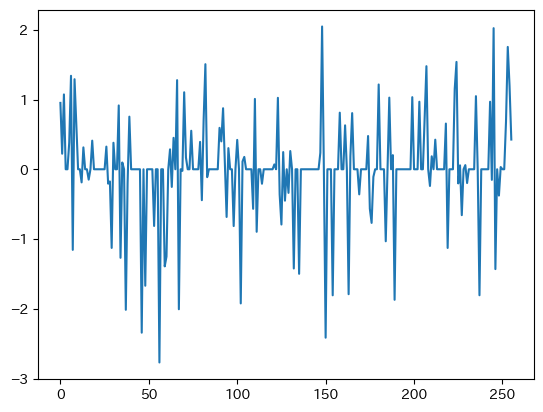

In [85]:
K = 1
seq = np.random.randn(n, K)
support = np.random.binomial(1,0.5,size=(n, K))
x = jnp.array(seq * support)
plt.plot(range(n), x);
y = batch_gen_y(x)

In [82]:
def softshrink(x, lam):
    return jnp.sign(x) * max(jnp.abs(x) - lam, 0)
batch_softshrink = jax.vmap(softshrink, in_axes=[-1, None], out_axes=-1)

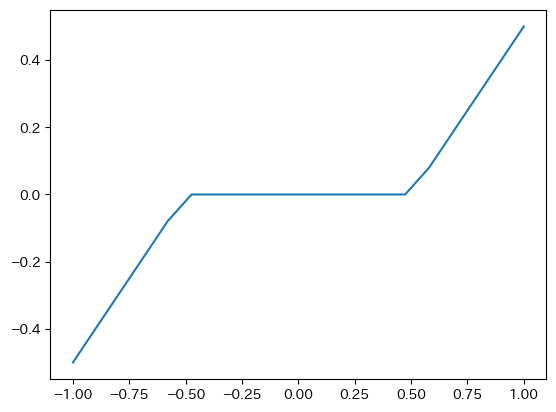

In [83]:
xs = np.linspace(-1, 1, 20)
# y = batch_softshrink(xs.reshape((1,20)), 0.5)
y = []
for x in xs:
    y.append(softshrink(x, 0.5))
plt.plot(xs, y)